<a href="https://colab.research.google.com/github/Mrsth/ken/blob/main/Ken_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ken/Glass")

In [3]:
df1.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Company name,Company State,Hourly,Employer_provided,Min salary,Max Salary,Average Salary,Same state,Company age
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Tecolote Research\n,NM,0,0,53,91,72.0,0,47
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,University of Maryland Medical System\n,MD,0,0,63,112,87.5,0,36
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,KnowBe4\n,FL,0,0,80,90,85.0,1,10
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",PNNL\n,WA,0,0,56,97,76.5,1,55
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Affinity Solutions\n,NY,0,0,86,143,114.5,1,22


In [4]:
df1.loc[df1["Industry"]=="-1"]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Company name,Company State,Hourly,Employer_provided,Min salary,Max Salary,Average Salary,Same state,Company age
41,43,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia\n3.6,"Marlborough, MA","Lowell, MA",1 to 50 employees,-1,Company - Private,-1,-1,Less than $1 million (USD),-1,Persivia\n,MA,0,0,68,129,98.5,0,-1
300,377,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\nLocation: Flexible thoug...,-1.0,Muso,"San Francisco, CA","San Francisco, CA",201 to 500 employees,-1,Nonprofit Organization,-1,-1,Unknown / Non-Applicable,-1,Muso,CA,0,1,85,90,87.5,1,-1
370,472,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,Kronos Bio,MA,0,1,100,140,120.0,0,-1
404,518,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,Kronos Bio,MA,0,1,110,130,120.0,0,-1
456,583,Data Scientist,$81K-$140K (Glassdoor est.),"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,ALIN,NY,0,0,81,140,110.5,0,-1
551,703,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,Kronos Bio,MA,0,1,100,140,120.0,0,-1
581,741,"Scientist – Cancer Discovery, Molecular Assay",Employer Provided Salary:$100K-$135K,"Scientist – Cancer Discovery, Molecular Assay\...",-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,-1,-1,Monte Rosa Therapeutics,MA,0,1,100,135,117.5,0,-1
609,778,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,Kronos Bio,MA,0,1,110,130,120.0,0,-1
641,819,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,Kronos Bio,MA,0,1,120,145,132.5,0,-1
730,943,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,Kronos Bio,MA,0,1,100,140,120.0,0,-1


In [5]:
# df1.loc[df1["Industry"]=="-1"].index
df1 = df1.drop(df1.loc[df1["Industry"]=="-1"].index, axis=0)
df1

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Company name,Company State,Hourly,Employer_provided,Min salary,Max Salary,Average Salary,Same state,Company age
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Tecolote Research\n,NM,0,0,53,91,72.0,0,47
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,University of Maryland Medical System\n,MD,0,0,63,112,87.5,0,36
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,KnowBe4\n,FL,0,0,80,90,85.0,1,10
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",PNNL\n,WA,0,0,56,97,76.5,1,55
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Affinity Solutions\n,NY,0,0,86,143,114.5,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",GSK\n,MA,0,0,58,111,84.5,0,190
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",Eventbrite\n,TN,0,0,72,133,102.5,0,14
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,Software Engineering Institute\n,PA,0,0,56,91,73.5,1,36
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,"Numeric, LLC\n",PA,0,0,95,160,127.5,0,-1


In [6]:
df1["Company State"].apply(lambda x: x.replace("Los Angeles", "LA"))

0       NM
1       MD
2       FL
3       WA
4       NY
      ... 
737     MA
738     TN
739     PA
740     PA
741     OH
Name: Company State, Length: 732, dtype: object

In [7]:
df1 = df1.astype({"Founded" : "str"})
df1.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Company name,Company State,Hourly,Employer_provided,Min salary,Max Salary,Average Salary,Same state,Company age
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Tecolote Research\n,NM,0,0,53,91,72.0,0,47
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,University of Maryland Medical System\n,MD,0,0,63,112,87.5,0,36
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,KnowBe4\n,FL,0,0,80,90,85.0,1,10
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",PNNL\n,WA,0,0,56,97,76.5,1,55
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Affinity Solutions\n,NY,0,0,86,143,114.5,1,22


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 741
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         732 non-null    int64  
 1   Job Title          732 non-null    object 
 2   Salary Estimate    732 non-null    object 
 3   Job Description    732 non-null    object 
 4   Rating             732 non-null    float64
 5   Company Name       732 non-null    object 
 6   Location           732 non-null    object 
 7   Headquarters       732 non-null    object 
 8   Size               732 non-null    object 
 9   Founded            732 non-null    object 
 10  Type of ownership  732 non-null    object 
 11  Industry           732 non-null    object 
 12  Sector             732 non-null    object 
 13  Revenue            732 non-null    object 
 14  Competitors        732 non-null    object 
 15  Company name       732 non-null    object 
 16  Company State      732 non

In [9]:
df1["Founded"] = df1["Founded"].apply(lambda x: x.replace("-1", "2020"))
df1["Founded"]

0      1973
1      1984
2      2010
3      1965
4      1998
       ... 
737    1830
738    2006
739    1984
740    2020
741    1967
Name: Founded, Length: 732, dtype: object

# **Different types of jobs available at given dataset of the glassdoor**

In [10]:
total_job_catagories = len(df1["Job Title"].unique())
print("There are altogether {} types of job vacancy available at the glassdoor.".format(total_job_catagories))

There are altogether 259 types of job vacancy available at the glassdoor.


In [11]:
job_title = df1["Job Title"].unique()
job_title

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

# **Different types of available Data Scientists**

In [12]:
only_data_scientists = set()
for job in job_title:
  if "Data Scientist" in job:
    only_data_scientists.add(job)
only_data_scientists

{'Ag Data Scientist',
 'Associate Data Scientist/Computer Scientist',
 'Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad',
 'Clinical Data Scientist',
 'College Hire - Data Scientist - Open to December 2019 Graduates',
 'Computational Chemist/Data Scientist',
 'Customer Data Scientist',
 'Customer Data Scientist/Sales Engineer',
 'Customer Data Scientist/Sales Engineer (Bay',
 'Data Scientist',
 'Data Scientist (Actuary, FSA or ASA)',
 'Data Scientist (Warehouse Automation)',
 'Data Scientist - Algorithms & Inference',
 'Data Scientist - Alpha Insights',
 'Data Scientist - Bioinformatics',
 'Data Scientist - Health Data Analytics',
 'Data Scientist - Quantitative',
 'Data Scientist - Research',
 'Data Scientist - Sales',
 'Data Scientist - Systems Engineering',
 'Data Scientist / Machine Learning Expert',
 'Data Scientist II',
 'Data Scientist Manager',
 'Data Scientist SR',
 'Data Scientist in Artificial Intelligence Early Career',
 'Data Scientist in Translatio

In [13]:
only_data_scientists_df = pd.DataFrame([only_data_scientists]).T
only_data_scientists_df.columns = ["Data Scientists Categories"]
only_data_scientists_df

,Data Scientists Categories
0,Customer Data Scientist/Sales Engineer
1,Software Engineer (Data Scientist/Software Eng...
2,Geospatial Software Developer and Data Scientist
3,Senior Machine Learning (ML) Engineer / Data S...
4,Staff Data Scientist
...,...
62,Senior Research Statistician- Data Scientist
63,Data Scientist - Sales
64,Computational Chemist/Data Scientist
65,Senior LiDAR Data Scientist


In [14]:
df1.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Company name,Company State,Hourly,Employer_provided,Min salary,Max Salary,Average Salary,Same state,Company age
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Tecolote Research\n,NM,0,0,53,91,72.0,0,47
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,University of Maryland Medical System\n,MD,0,0,63,112,87.5,0,36
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,KnowBe4\n,FL,0,0,80,90,85.0,1,10
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",PNNL\n,WA,0,0,56,97,76.5,1,55
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Affinity Solutions\n,NY,0,0,86,143,114.5,1,22


# **Company having the highest rating**

In [15]:
df1.loc[df1["Rating"].idxmax(),["Job Title","Rating", "Company Name"]]

Job Title          Data Scientist
Rating                          5
Company Name    BPA Services\n5.0
Name: 45, dtype: object

In [16]:
df1["Company Name"] = df1["Company Name"].apply(lambda x: x.replace("\n5.0","").replace("\n","").replace("\n3.8", ""))
df1.loc[df1["Rating"] == 5][["Job Title", "Company Name", "Rating"]]

,Job Title,Company Name,Rating
45,Data Scientist,BPA Services,5.0
138,Data Engineer,Gridiron IT,5.0
373,Data Scientist,BPA Services,5.0
424,Data Scientist,Royce Geospatial,5.0
693,Senior Data Scientist,SkySync,5.0


In [17]:
df1.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Company name,Company State,Hourly,Employer_provided,Min salary,Max Salary,Average Salary,Same state,Company age
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Tecolote Research\n,NM,0,0,53,91,72.0,0,47
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,University of Maryland Medical System\n,MD,0,0,63,112,87.5,0,36
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe44.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,KnowBe4\n,FL,0,0,80,90,85.0,1,10
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",PNNL\n,WA,0,0,56,97,76.5,1,55
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Affinity Solutions\n,NY,0,0,86,143,114.5,1,22


# **Number of industry and the number of job applications available**

In [18]:
df1["Industry"].value_counts()

Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      42
Consulting                                   29
Internet                                     29
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
Staffing & Outsourcing                       10
Travel Agencies                               8
Financial Analytics & Research                8
Food & Beverage Manufacturing                 8
Lending                                 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


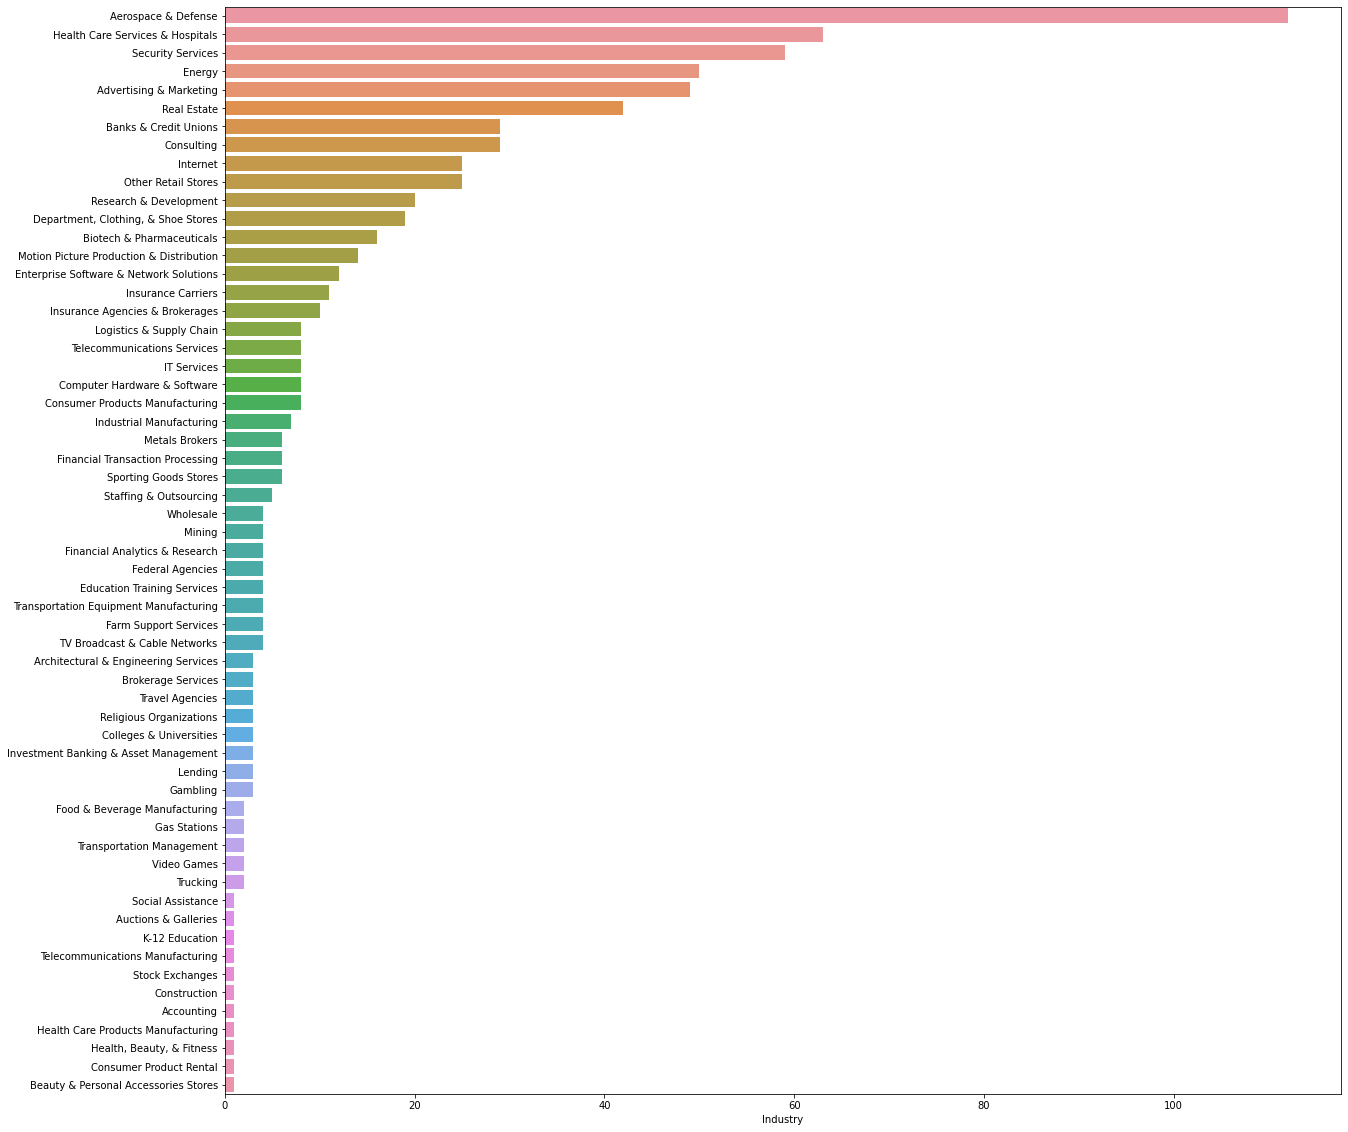

In [19]:
plt.figure(figsize=(20,20))
sns.barplot(df1["Industry"].value_counts(), df1["Industry"].unique())

# **How many company are there in each state?**

In [20]:
df1["Company State"].value_counts()

 CA             150
 MA              95
 NY              71
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 IN              10
 UT              10
 WI              10
 MO               9
 AZ               9
 AL               8
 DE               6
 KY               6
 MI               6
 GA               6
 IA               5
 CT               5
 LA               4
 OR               4
 NE               4
 KS               3
 NM               3
 ID               2
 MN               2
 SC               1
 Los Angeles      1
 RI               1
Name: Company State, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


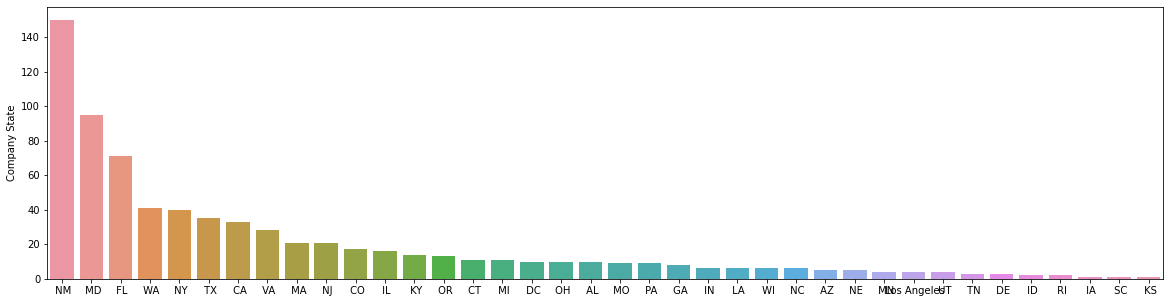

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(df1["Company State"].unique(),df1["Company State"].value_counts())

# **Which is the oldest company?**

In [22]:
df1

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Company name,Company State,Hourly,Employer_provided,Min salary,Max Salary,Average Salary,Same state,Company age
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,Tecolote Research\n,NM,0,0,53,91,72.0,0,47
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,University of Maryland Medical System\n,MD,0,0,63,112,87.5,0,36
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe44.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,KnowBe4\n,FL,0,0,80,90,85.0,1,10
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",PNNL\n,WA,0,0,56,97,76.5,1,55
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Affinity Solutions\n,NY,0,0,86,143,114.5,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",GSK\n,MA,0,0,58,111,84.5,0,190
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",Eventbrite\n,TN,0,0,72,133,102.5,0,14
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,Software Engineering Institute\n,PA,0,0,56,91,73.5,1,36
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,2020,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,"Numeric, LLC\n",PA,0,0,95,160,127.5,0,-1


In [23]:
df1["Founded"].unique()

array(['1973', '1984', '2010', '1965', '1998', '2000', '2008', '2005',
       '2014', '2009', '2011', '1968', '1962', '2012', '1781', '1995',
       '1915', '2013', '1935', '1849', '1952', '1852', '1997', '1996',
       '1974', '1969', '1870', '1985', '2015', '1993', '2020', '1958',
       '1986', '1999', '1925', '1912', '2002', '1863', '1939', '2016',
       '1885', '2006', '1948', '2003', '1927', '1978', '1860', '2017',
       '1942', '1990', '1988', '2001', '2007', '1992', '1994', '1977',
       '2019', '1982', '1937', '1878', '1966', '1971', '1943', '1987',
       '1945', '1846', '1851', '1976', '1981', '1970', '1951', '1967',
       '1961', '1964', '1930', '1917', '1883', '1887', '2004', '1850',
       '1902', '1744', '1929', '1947', '1991', '1989', '1928', '1875',
       '1913', '1972', '1856', '1983', '1922', '1812', '1914', '1980',
       '1954', '1830', '1975', '1899', '1979', '1889'], dtype=object)

In [24]:
company_age = [2020- int(i) for i in df1["Founded"]]
df1["Company age"] = company_age

In [25]:
print("Oldest Company was founded in {} and its age in 2020 is {}".format(df1["Founded"].min(), df1["Company age"].max()))

Oldest Company was founded in 1744 and its age in 2020 is 276
